** Ta đọc 4 file từ tập Tín Hiệu Huấn Luyện **

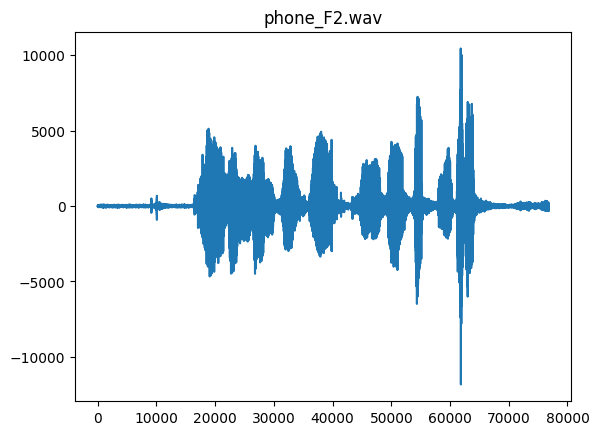

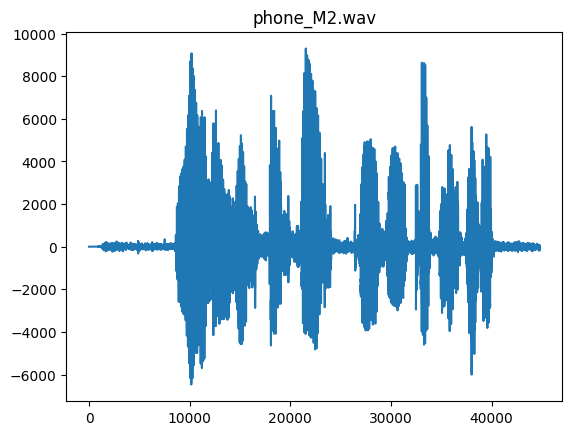

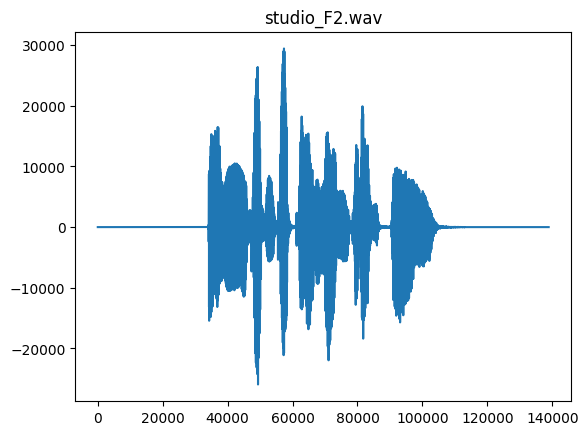

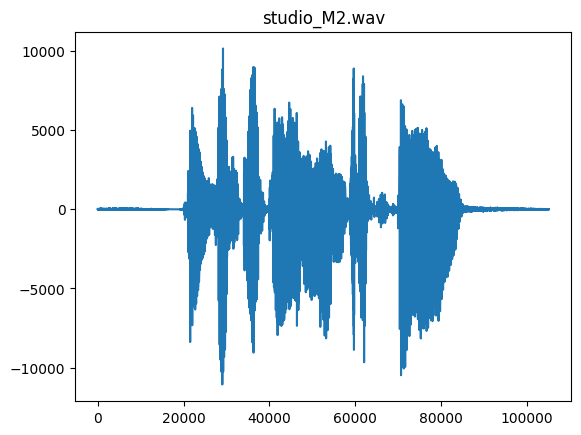

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

files = []
files.append(AudioSegment.from_file("TinHieuHuanLuyen\phone_F2.wav"))
files.append(AudioSegment.from_file("TinHieuHuanLuyen\phone_M2.wav"))
files.append(AudioSegment.from_file("TinHieuHuanLuyen\studio_F2.wav"))
files.append(AudioSegment.from_file("TinHieuHuanLuyen\studio_M2.wav"))

PF2 = np.array(files[0].get_array_of_samples())
PM2 = np.array(files[1].get_array_of_samples())
SF2 = np.array(files[2].get_array_of_samples())
SM2 = np.array(files[3].get_array_of_samples())

plt.plot(PF2)
plt.title("phone_F2.wav")

plt.figure()
plt.plot(PM2)
plt.title("phone_M2.wav")

plt.figure()
plt.plot(SF2)
plt.title("studio_F2.wav")

plt.figure()
plt.plot(SM2)
plt.title("studio_M2.wav")

plt.show()

Tính STE (Short Time Energy) của từng tập huấn luyện.

Chia tập huấn luyện thành các frame, mỗi frame có độ dài 2048 mẫu và tính STE trên từng frame.

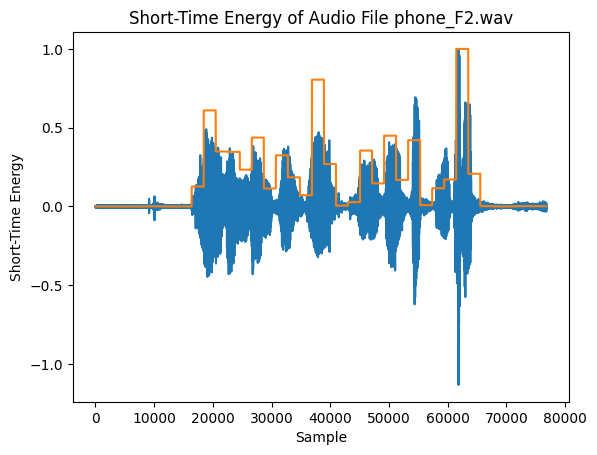

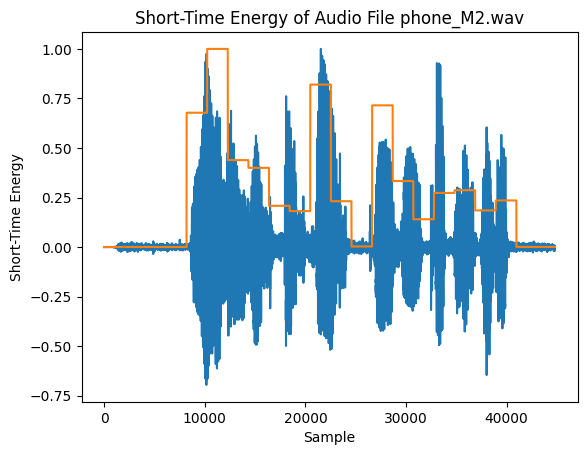

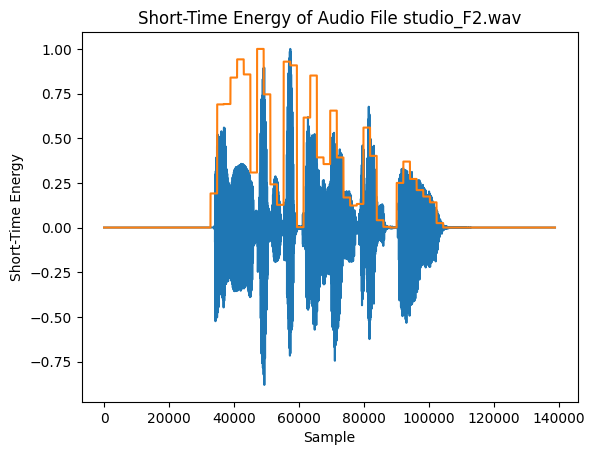

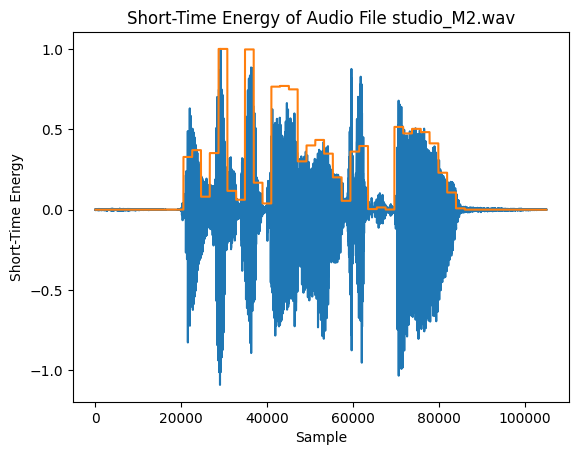

In [85]:
def STE(frame):
    return sum([x**2 for x in frame]) / len(frame)

# Define frame parameters
frame_size = 2048
hop_size = 2048

num_frames_PF2 = int(np.ceil(len(PF2) / hop_size))
num_frames_PM2 = int(np.ceil(len(PM2) / hop_size))
num_frames_SF2 = int(np.ceil(len(SF2) / hop_size))
num_frames_SM2 = int(np.ceil(len(SM2) / hop_size))

frames_PF2 = np.zeros((num_frames_PF2, frame_size))
frames_PM2 = np.zeros((num_frames_PM2, frame_size))
frames_SF2 = np.zeros((num_frames_SF2, frame_size))
frames_SM2 = np.zeros((num_frames_SM2, frame_size))

# Lấy từng frame của samples
for i in range(num_frames_PF2):
    frame_start = i * hop_size
    frame_end = frame_start + frame_size
    frame = PF2[frame_start:frame_end]
    frames_PF2[i, : len(frame)] = frame
    
for i in range(num_frames_PM2):
    frame_start = i * hop_size
    frame_end = frame_start + frame_size
    frame = PM2[frame_start:frame_end]
    frames_PM2[i, : len(frame)] = frame
    
for i in range(num_frames_SF2):
    frame_start = i * hop_size
    frame_end = frame_start + frame_size
    frame = SF2[frame_start:frame_end]
    frames_SF2[i, : len(frame)] = frame
    
for i in range(num_frames_SM2):
    frame_start = i * hop_size
    frame_end = frame_start + frame_size
    frame = SM2[frame_start:frame_end]
    frames_SM2[i, : len(frame)] = frame
    
# Calculate STE
ste_PF2 = np.zeros(num_frames_PF2)
ste_PM2 = np.zeros(num_frames_PM2)
ste_SF2 = np.zeros(num_frames_SF2)
ste_SM2 = np.zeros(num_frames_SM2)

for i in range(num_frames_PF2):
    ste_PF2[i] = STE(frames_PF2[i, :])
ste_PF2 = ste_PF2 / np.max(ste_PF2)

for i in range(num_frames_PM2):
    ste_PM2[i] = STE(frames_PM2[i, :])
ste_PM2 = ste_PM2 / np.max(ste_PM2)

for i in range(num_frames_SF2):
    ste_SF2[i] = STE(frames_SF2[i, :])
ste_SF2 = ste_SF2 / np.max(ste_SF2)

for i in range(num_frames_SM2):
    ste_SM2[i] = STE(frames_SM2[i, :])
ste_SM2 = ste_SM2 / np.max(ste_SM2)

#plot STE
ste_samples_PF2 = np.zeros(len(PF2))
for i in range(num_frames_PF2):
    ste_samples_PF2[i * hop_size: i * hop_size + frame_size] = ste_PF2[i]
    
ste_samples_PM2 = np.zeros(len(PM2))
for i in range(num_frames_PM2):
    ste_samples_PM2[i * hop_size: i * hop_size + frame_size] = ste_PM2[i]
    
ste_samples_SF2 = np.zeros(len(SF2))
for i in range(num_frames_SF2):
    ste_samples_SF2[i * hop_size: i * hop_size + frame_size] = ste_SF2[i]
    
ste_samples_SM2 = np.zeros(len(SM2))
for i in range(num_frames_SM2):
    ste_samples_SM2[i * hop_size: i * hop_size + frame_size] = ste_SM2[i]

plt.plot(PF2 / abs(np.max(PF2)))
plt.plot(ste_samples_PF2)
plt.xlabel("Sample")
plt.ylabel("Short-Time Energy")
plt.title("Short-Time Energy of Audio File phone_F2.wav")

plt.figure()
plt.plot(PM2 / abs(np.max(PM2)))
plt.plot(ste_samples_PM2)
plt.xlabel("Sample")
plt.ylabel("Short-Time Energy")
plt.title("Short-Time Energy of Audio File phone_M2.wav")

plt.figure()
plt.plot(SF2 / abs(np.max(SF2)))
plt.plot(ste_samples_SF2)
plt.xlabel("Sample")
plt.ylabel("Short-Time Energy")
plt.title("Short-Time Energy of Audio File studio_F2.wav")

plt.figure()
plt.plot(SM2 / abs(np.max(SM2)))
plt.plot(ste_samples_SM2)
plt.xlabel("Sample")
plt.ylabel("Short-Time Energy")
plt.title("Short-Time Energy of Audio File studio_M2.wav")

plt.show()

Đánh nhãn các frame là tiếng nói hoặc khoảng lặng dựa trên các khoảng cho trước từ file .lab

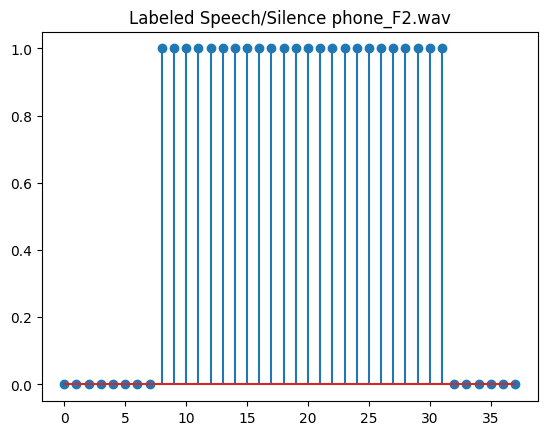

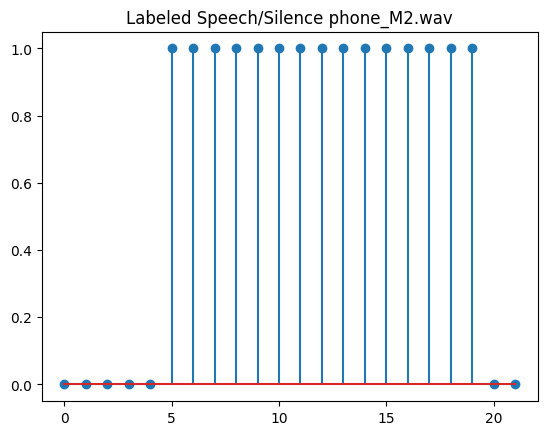

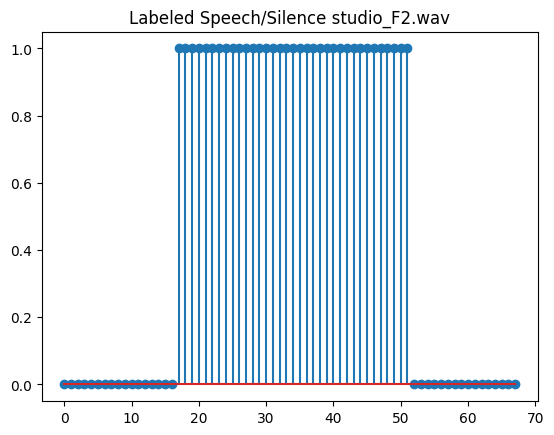

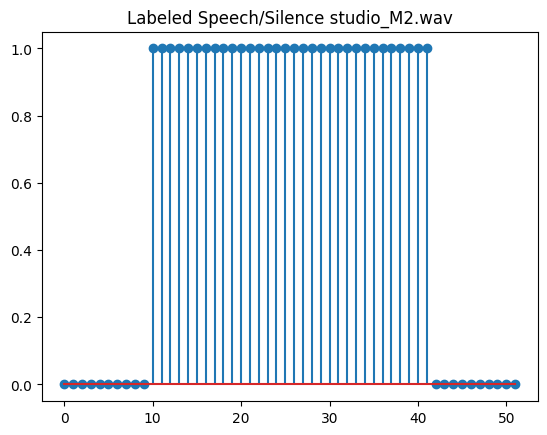

In [86]:
sample_rate_PF2 = files[0].frame_rate
sample_rate_PM2 = files[1].frame_rate
sample_rate_SF2 = files[2].frame_rate
sample_rate_SM2 = files[3].frame_rate

label_PF2 = np.zeros(num_frames_PF2)
label_PM2 = np.zeros(num_frames_PM2)
label_SF2 = np.zeros(num_frames_SF2)
label_SM2 = np.zeros(num_frames_SM2)

speech_PF2 = [(1.02, 4.04)]

silence_PF2 = [(0.00, 1.02), 
               (4.04, 4.80),]

for i in range(num_frames_PF2):
    t = i * hop_size / sample_rate_PF2
    for start, end in silence_PF2:
        if(t >= start and t <= end):
            label_PF2[i] = 0
            break
    for start, end in speech_PF2:
        if(t >= start and t <= end):
            label_PF2[i] = 1
            break

speech_PM2 = [(0.53, 2.52)]

silence_PM2 = [(0.00, 0.53), 
               (2.52, 2.80),]

for i in range(num_frames_PM2):
    t = i * hop_size / sample_rate_PM2
    for start, end in silence_PM2:
        if(t >= start and t <= end):
            label_PM2[i] = 0
            break
    for start, end in speech_PM2:
        if(t >= start and t <= end):
            label_PM2[i] = 1
            break

speech_SF2 = [(0.77, 2.37)]

silence_SF2 = [(0.00, 0.77), 
               (2.37, 3.14),]

for i in range(num_frames_SF2):
    t = i * hop_size / sample_rate_SF2
    for start, end in silence_SF2:
        if(t >= start and t <= end):
            label_SF2[i] = 0
            break
    for start, end in speech_SF2:
        if(t >= start and t <= end):
            label_SF2[i] = 1
            break

speech_SM2 = [(0.45, 1.93)]

silence_SM2 = [(0.00, 0.45), 
               (1.93, 2.38),]

for i in range(num_frames_SM2):
    t = i * hop_size / sample_rate_SM2
    for start, end in silence_SM2:
        if(t >= start and t <= end):
            label_SM2[i] = 0
            break
    for start, end in speech_SM2:
        if(t >= start and t <= end):
            label_SM2[i] = 1
            break

plt.stem(label_PF2)
plt.title("Labeled Speech/Silence phone_F2.wav")

plt.figure()
plt.stem(label_PM2)
plt.title("Labeled Speech/Silence phone_M2.wav")

plt.figure()
plt.stem(label_SF2)
plt.title("Labeled Speech/Silence studio_F2.wav")

plt.figure()
plt.stem(label_SM2)
plt.title("Labeled Speech/Silence studio_M2.wav")

plt.show()

Gộp các nhãn vùa đánh vào chung một mảng các nhãn để huấn luyện, tương tự với STE

In [87]:
label = np.concatenate([label_PF2, label_PM2, label_SF2, label_SM2])

ste = np.concatenate([ste_PF2, ste_PM2, ste_SF2, ste_SM2])

Xác định ngưỡng tối ưu sử dụng hàm cost function

cost = (số frame TN nhầm thành KL + số frame KL nhầm thành TN) / tổng số frame


In [88]:
def cost_function(threshold):
    is_voiced = np.zeros(num_frames_PF2 + num_frames_PM2 + num_frames_SF2 + num_frames_SM2)
    for i in range(num_frames_PF2 + num_frames_PM2 + num_frames_SF2 + num_frames_SM2):
        is_voiced[i] = 1 if ste[i] >= threshold else 0
    
    countTP = 0 #Tiếng nói nhận dạng đúng
    countTN = 0 #Tiếng nói nhầm thành khoảng lặng
    for i in range(len(is_voiced)):
        if is_voiced[i] == True and label[i] == False:
            countTN += 1 # True Negative
        elif is_voiced[i] == True and label[i] == True:
            countTP += 1 # True Positive
    
    countFP = 0 #Khoảng lặng nhận dạng đúng
    countFN = 0 #Khoảng lặng nhầm thành TN
    for i in range(len(is_voiced)):
        if is_voiced[i] == False and label[i] == True:
            countFP += 1 # False Positive
        elif is_voiced[i] == False and label[i] == False:
            countFN += 1 # False Negative
    
    return (countTN + countFP) / (countTP + countTN + countFP + countFN)

Cho giá trị ngưỡng từ 0 đến 1 với 10000 giá trị ngưỡng



Ta có sơ đồ cost function theo ngưỡng như hình dưới

Optimal threshold value: 0.0021002100210021
Minimum cost: 0.027777777777777776


Text(0, 0.5, 'Cost function')

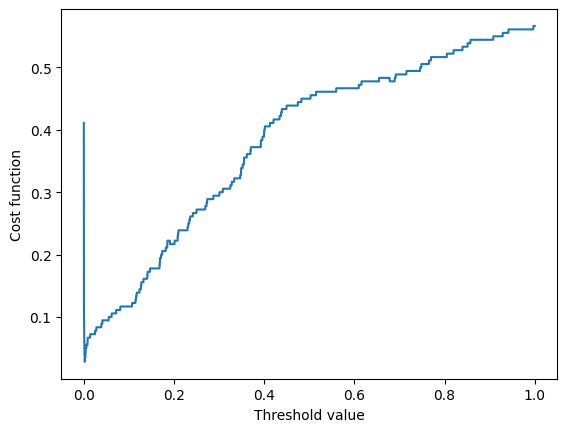

In [89]:
# Define the range of threshold values to search over
threshold_values = np.linspace(0, 1, num=10000)

# Find the threshold value that minimizes the cost function
min_threshold = np.argmin([cost_function(T) for T in threshold_values])

# Print the optimal threshold value and the corresponding cost
print("Optimal threshold value:", threshold_values[min_threshold])
print("Minimum cost:", cost_function(threshold_values[min_threshold]))

cost = []
for i in range(len(threshold_values)):
    cost.append(cost_function(threshold_values[i]))
    
plt.plot(threshold_values, cost)
plt.xlabel("Threshold value")
plt.ylabel("Cost function")

=> Ngưỡng tối ưu là 0.0021002100210021 với tỉ lệ nhận dạng nhầm thấp nhất là 0.027777777777777776

Đọc 4 file từ tập Tín Hiệu Kiểm Thử và phân đoạn dựa trên ngưỡng tối ưu đã tìm được

Tính hiệu suất phân đoạn dựa trên kết quả tìm được so với nhãn đã cho trước

Text(0.5, 1.0, 'Classification of Audio Frames')

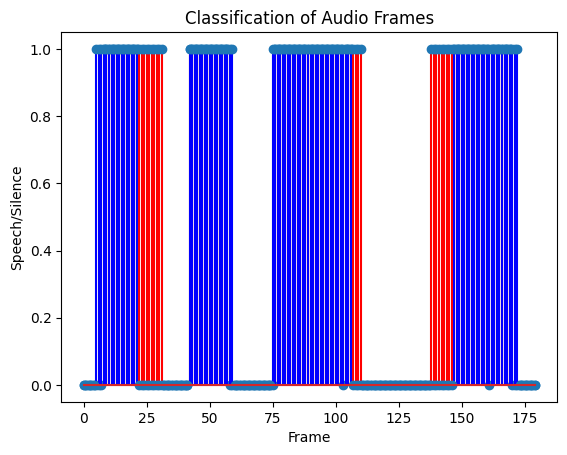

In [90]:
files_KT = []
files_KT.append(AudioSegment.from_file("TinHieuKiemThu\phone_F1.wav"))
files_KT.append(AudioSegment.from_file("TinHieuKiemThu\phone_M1.wav"))
files_KT.append(AudioSegment.from_file("TinHieuKiemThu\studio_F1.wav"))
files_KT.append(AudioSegment.from_file("TinHieuKiemThu\studio_M1.wav"))

sample_rate_PF1 = files_KT[0].frame_rate
sample_rate_PM1 = files_KT[1].frame_rate
sample_rate_SF1 = files_KT[2].frame_rate
sample_rate_SM1 = files_KT[3].frame_rate

PF1 = np.array(files[0].get_array_of_samples())
PM1 = np.array(files[1].get_array_of_samples())
SF1 = np.array(files[2].get_array_of_samples())
SM1 = np.array(files[3].get_array_of_samples())

num_frames_PF1 = int(np.ceil(len(PF1) / hop_size))
num_frames_PM1 = int(np.ceil(len(PM1) / hop_size))
num_frames_SF1 = int(np.ceil(len(SF1) / hop_size))
num_frames_SM1 = int(np.ceil(len(SM1) / hop_size))

label_PF1 = np.zeros(num_frames_PF1)
label_PM1 = np.zeros(num_frames_PM1)
label_SF1 = np.zeros(num_frames_SF1)
label_SM1 = np.zeros(num_frames_SM1)

speech_PF1 = [(0.53, 2.75)]

silence_PF1 = [(0.00, 0.53), 
               (2.75, 3.23),]

for i in range(num_frames_PF1):
    t = i * hop_size / sample_rate_PF1
    for start, end in silence_PF1:
        if(t >= start and t <= end):
            label_PF1[i] = 0
            break
    for start, end in speech_PF1:
        if(t >= start and t <= end):
            label_PF1[i] = 1
            break
        
speech_PM1 = [(0.46, 3.52)]

silence_PM1 = [(0.00, 0.46), 
               (3.52, 4.15),]

for i in range(num_frames_PM1):
    t = i * hop_size / sample_rate_PM1
    for start, end in silence_PM1:
        if(t >= start and t <= end):
            label_PM1[i] = 0
            break
    for start, end in speech_PM1:
        if(t >= start and t <= end):
            label_PM1[i] = 1
            break
        
speech_SF1 = [(0.68, 2.15)]

silence_SF1 = [(0.00, 0.68), 
               (2.15, 2.86),]

for i in range(num_frames_SF1):
    t = i * hop_size / sample_rate_SF1
    for start, end in silence_SF1:
        if(t >= start and t <= end):
            label_SF1[i] = 0
            break
    for start, end in speech_SF1:
        if(t >= start and t <= end):
            label_SF1[i] = 1
            break
        
speech_SM1 = [(0.87, 2.06)]

silence_SM1 = [(0.00, 0.87), 
               (2.06, 2.73),]

for i in range(num_frames_SM1):
    t = i * hop_size / sample_rate_SM1
    for start, end in silence_SM1:
        if(t >= start and t <= end):
            label_SM1[i] = 0
            break
    for start, end in speech_SM1:
        if(t >= start and t <= end):
            label_SM1[i] = 1
            break
        
label_KT = np.concatenate([label_PF1, label_PM1, label_SF1, label_SM1])

frames_PF1 = np.zeros((num_frames_PF1, frame_size))
frames_PM1 = np.zeros((num_frames_PM1, frame_size))
frames_SF1 = np.zeros((num_frames_SF1, frame_size))
frames_SM1 = np.zeros((num_frames_SM1, frame_size))

for i in range(num_frames_PF1):
    frame_start = i * hop_size
    frame_end = frame_start + frame_size
    frame = PF1[frame_start:frame_end]
    frames_PF1[i, : len(frame)] = frame
    
for i in range(num_frames_PM1):
    frame_start = i * hop_size
    frame_end = frame_start + frame_size
    frame = PM1[frame_start:frame_end]
    frames_PM1[i, : len(frame)] = frame
    
for i in range(num_frames_SF1):
    frame_start = i * hop_size
    frame_end = frame_start + frame_size
    frame = SF1[frame_start:frame_end]
    frames_SF1[i, : len(frame)] = frame
    
for i in range(num_frames_SM1):
    frame_start = i * hop_size
    frame_end = frame_start + frame_size
    frame = SM1[frame_start:frame_end]
    frames_SM1[i, : len(frame)] = frame
    
ste_PF1 = np.zeros(num_frames_PF1)
ste_PM1 = np.zeros(num_frames_PM1)
ste_SF1 = np.zeros(num_frames_SF1)
ste_SM1 = np.zeros(num_frames_SM1)

for i in range(num_frames_PF1):
    ste_PF1[i] = STE(frames_PF1[i, :])
ste_PF1 = ste_PF1 / np.max(ste_PF1)

for i in range(num_frames_PM1):
    ste_PM1[i] = STE(frames_PM1[i, :])
ste_PM1 = ste_PM1 / np.max(ste_PM1)

for i in range(num_frames_SF1):
    ste_SF1[i] = STE(frames_SF1[i, :])
ste_SF1 = ste_SF1 / np.max(ste_SF1)

for i in range(num_frames_SM1):
    ste_SM1[i] = STE(frames_SM1[i, :])
ste_SM1 = ste_SM1 / np.max(ste_SM1)

ste_KT = np.concatenate([ste_PF2, ste_PM2, ste_SF2, ste_SM2])

threshold = 0.0021002100210021

is_voiced = np.zeros(len(ste_KT))
for i in range(len(ste_KT)):
        is_voiced[i] = 1 if ste_KT[i] >= threshold else 0
        
plt.stem(is_voiced, 'r',  use_line_collection=True)
plt.stem(label_KT, 'b', use_line_collection=True)
plt.xlabel("Frame")
plt.ylabel("Speech/Silence")
plt.title("Classification of Audio Frames")



Hiệu suất phân lớp đúng của tín hiệu kiểm thử được tính như sau:

In [91]:
print("Efficiency: ", ((np.sum(label_KT == is_voiced) / len(is_voiced))) * 100 , "%")

Efficiency:  81.11111111111111 %


Biểu đồ trên cho thấy sự tương quan giữa số khung nhận diện sai so với nhãn thực tế, màu đỏ thể hiện cho số frame khoảng lặng nhận diện nhầm thành tiếng nói, màu xanh thể hiện cho số frame là tiếng nói đúng theo nhãn đã có sẵn